<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مبانی بینایی 3 بعدی (پاییز 1402)
        </font>
		<p></p>
        <h1 style="text-align: center">
        تمرین اول - بخش عملی
        </h1>
		<h2 style="text-align: center">
        نام و نام خانوادگی:ابوالفضل اسحاق 
		<br>
		شماره دانشجویی:99101105 
		<br>
		</h2>		 
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 1
        </font>
		<p></p>
		<hr>
       الف- ماتریس زیر را در نظر بگیرید، با استفاده از کتابخانه‌های موجود یک 2D DFT بر روی آن اعمال کنید و به فضای فرکانس ببرید و نتیجه را چاپ نمایید.
	   <br>
	</font>
</div>

In [5]:
import numpy as np

matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])


dft_matrix = np.fft.fft2(matrix)


print("Original Matrix:\n", matrix)
print("\nDiscrete Fourier Transform:\n", dft_matrix)



Original Matrix:
 [[ 3  4 -3  1  2]
 [ 6  5 -4  8 -6]
 [-7  1  5  7  9]
 [-9 -2  5  6  3]
 [ 9  6  8 -2  5]]

Discrete Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 [  3.2532889  +9.11453775j  40.08610463-11.63719218j
  -10.        -14.49036173j  40.02379874 +8.75126649j
   29.53444185+16.6497449j ]
 [-15.7532889 +21.40502748j -12.52379874+19.86618572j
  -32.58610463 -4.56352474j   0.46555815-12.05346401j
  -10.         -6.3268805j ]
 [-15.7532889 -21.40502748j -10.         +6.3268805j
    0.46555815+12.05346401j -32.58610463 +4.56352474j
  -12.52379874-19.86618572j]
 [  3.2532889  -9.11453775j  29.53444185-16.6497449j
   40.02379874 -8.75126649j -10.        +14.49036173j
   40.08610463+11.63719218j]]


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
       ب- بدون استفاده از کتابخانه‌های آماده خودتان تابع تبدیل فوریه را بنویسید و تصویر 1.jpg را به فضای فوریه ببرید و نتیجه را چاپ کنید.
</font> 
</div>

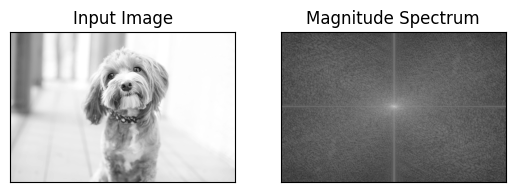

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread(r'PATH', 0)
img = cv2.imread('/kaggle/input/visionhw1/1.jpg', 0)

# TODO

def discrete_fourier_transform(x):
    # first we implement code for 1d transform
    # we must implement sigma_N(x_n.e^(-2j*(pi)*k*n/N))
    if len(x.shape) == 1:
        length = x.shape[0] # length = N
        indices = np.arange(length) # indices = n
        k = indices.reshape((length, 1)) # k
        omega = np.exp(-2j * np.pi * k * indices / length) # to be multiplied by x_n
        fourier = np.dot(omega, x)
        return fourier
    # now we implement 2d transform
    # we must implement 2 sigmas
    # we use the 1d transform we implemented for the inner sum
    elif len(x.shape) == 2:
        rows, cols = x.shape
        matrix = np.zeros((rows, cols), dtype=complex)

        for i in range(rows):
            matrix[i,:] = discrete_fourier_transform(x[i,:])
        
        for j in range(cols):
            matrix[:,j] = discrete_fourier_transform(matrix[:,j])
        
        return matrix
    # just in case the input is wrong!
    else:
        raise ValueError("Input must be either 1D or 2D.")


fourier = np.fft.fftshift(discrete_fourier_transform(img))
magnitude_spectrum = 10*np.log(np.abs(fourier))
    
# fourier_transform_and_plot(img)    
    

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 2
        </font>
		<p></p>
		<hr>
       فیلترهای فضایی Smooth کردن تصویر شامل Gaussian Blur, Average Pooling و Low pass filter را خودتان پیاده سازی کرده و بر روی تصویر 2.png اعمال کنید.
	   <br>
	</font>
</div>

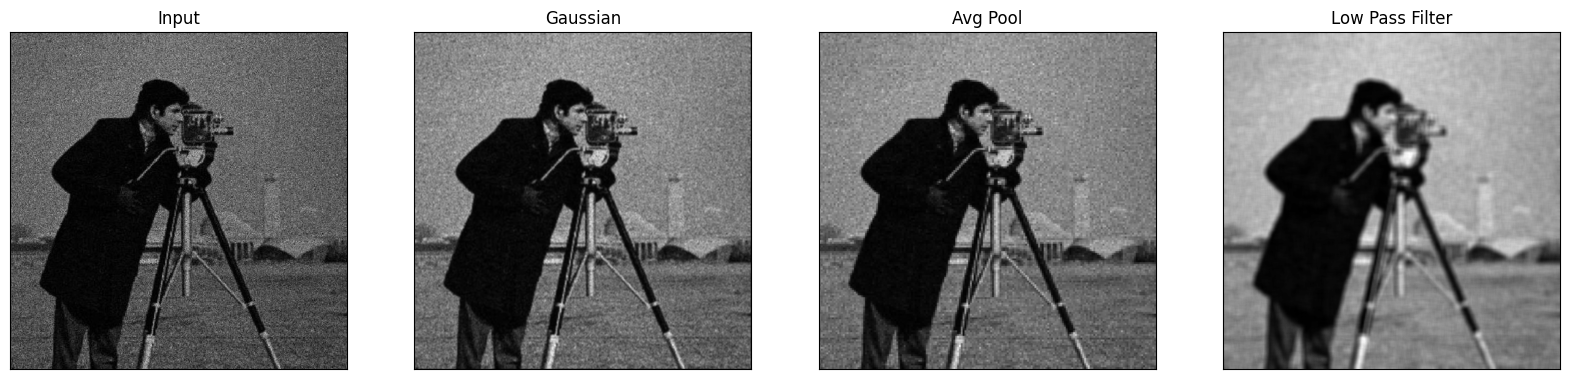

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('/kaggle/input/visionhw1/2.png', cv2.IMREAD_GRAYSCALE)




# TODO
def average_pooling(img, size):
    h, w = img.shape
    h2 = h // size
    w2 = w // size
    img_pooled = np.zeros((h2, w2))
    for i in range(h2):
        for j in range(w2):
            img_pooled[i, j] = np.mean(img[i*size:(i+1)*size, j*size:(j+1)*size])
    return img_pooled

# def gaussian_blur(img, sigma):
#     h, w = img.shape
#     img_padded = np.zeros((h+6, w+6))
#     img_padded[3:-3, 3:-3] = img
#     img_smoothed = np.zeros((h, w))
#     for i in range(h):
#         for j in range(w):
#             img_smoothed[i, j] = np.sum(img_padded[i:i+7, j:j+7] * gaussian_kernel(sigma))
#     return img_smoothed

# def gaussian_blur(img, sigma, kernel_size):
#     h, w = img.shape
#     img_padded = np.zeros((h+kernel_size, w+kernel_size))
#     img_padded[3:-3, 3:-3] = img
#     img_smoothed = np.zeros((h, w))
#     for i in range(h):
#         for j in range(w):
#             img_smoothed[i, j] = np.sum(img_padded[i:i+kernel_size, j:j+kernel_size] * gaussian_kernel(sigma))
#     return img_smoothed

# def gaussian_kernel(sigma):
#     x = np.arange(-3*sigma, 3*sigma+1)
#     kernel = np.exp(-x**2 / (2*sigma**2))
#     kernel /= np.sum(kernel)
#     return kernel
def gaussian_blur(img, sigma, kernel_size):
    h, w = img.shape
#     img_padded = np.zeros((h+kernel_size-1, w+kernel_size-1))
#     img_padded[kernel_size//2:-kernel_size//2+1, kernel_size//2:-kernel_size//2+1] = img
    img_padded = np.pad(img, kernel_size // 2, mode='constant')
    img_filtered = np.zeros((h, w))
    gaus_kernel = gaussian_kernel(sigma, kernel_size)
    for i in range(h):
        for j in range(w):
            img_filtered[i, j] = np.sum(img_padded[i:i+kernel_size, j:j+kernel_size] * gaus_kernel)
    return img_filtered
def gaussian_kernel(sigma, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i, j] = np.exp(-(i**2+j**2)/(2*sigma**2))
    return kernel / np.sum(kernel)

# def low_pass_filter(img, sigma):
#     h, w = img.shape
#     img_padded = np.zeros((h+6, w+6))
#     img_padded[3:-3, 3:-3] = img
#     img_filtered = np.zeros((h, w))
#     for i in range(h):
#         for j in range(w):
#             img_filtered[i, j] = np.sum(img_padded[i:i+7, j:j+7] * gaussian_kernel(sigma))
#     return img_filtered
def low_pass_filter(img, kernel_size):
#     h, w = img.shape
#     img_padded = np.zeros((h+2, w+2))
#     img_padded[1:-1, 1:-1] = img
#     img_filtered = np.zeros((h, w))
#     for i in range(h):
#         for j in range(w):
#             img_filtered[i, j] = np.sum(img_padded[i:i+3, j:j+3] * gaussian_kernel(sigma, 3))
#     return img_filtered
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    low_pass_img = cv2.filter2D(img, -1, kernel)
    return low_pass_img



# print(img.shape)
# Apply average pooling
avg_pool_img = average_pooling(img, 3)

# Apply Gaussian blur
gaussian_img = gaussian_blur(img, 5, 3)

filtered_image = low_pass_filter(img, 10)

    

plt.figure(figsize=(20, 5))  

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 3
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و تبدیل‌های HSV و YCbCr را بر روی تصاویر اعمال کرده و در خروجی نشان دهید.
	   <br>
	</font>
</div>

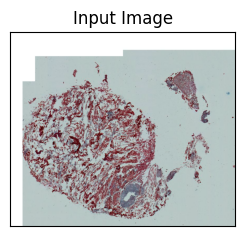

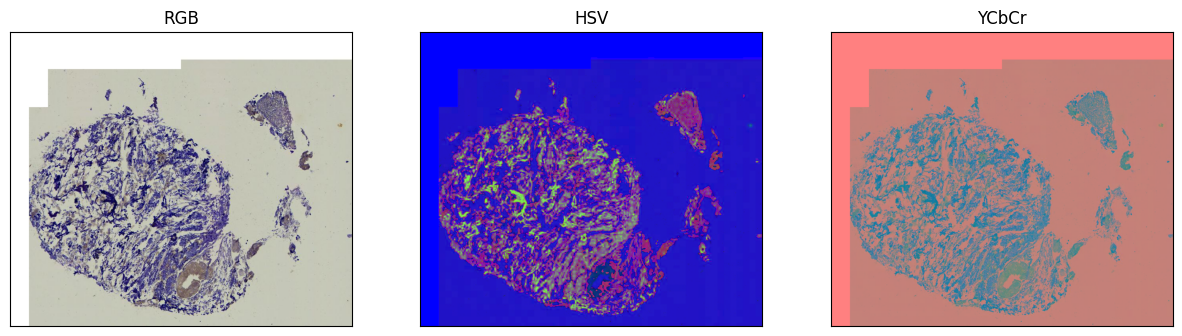

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# TODO
img = cv2.imread('/kaggle/input/visionhw1/3.jpg')
plt.subplot(121),plt.imshow(img)
plt.title('Input Image'),plt.xticks([]), plt.yticks([])
plt.show()
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
ycbcr_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YCrCb)


plt.figure(figsize=(15, 5))  

# plt.subplot(131),plt.imshow(img)
plt.subplot(131),plt.imshow(rgb_img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img, cmap = 'gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 4
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و پس از حذف نویزهای نمک و فلفلی از روی تصویر، بک‌گراند تصویر را حذف کنید. (دقت کنید که بک‌گراند شامل بخش‌های سفیدرنگ و بخش‌های کرمی‌رنگ می‌باشد.)
	   <br>
	</font>
</div>

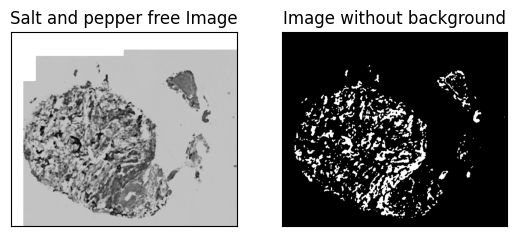

In [23]:
def remove_salt_and_pepper(img, size):
    # we get the height and width of input img
    h, w = img.shape
    img_filtered = np.zeros((h, w))
    # now we use median filter implemented in np to remove salt and pepper noises
    for i in range(h):
        for j in range(w):
            img_filtered[i, j] = np.median(img[i:i+size, j:j+size])
    return img_filtered

def remove_background(img, threshold):
    height, width = img.shape # height and width of img
    background_removed_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            # we can change the threshold manually when we call the function
            if img[i, j] < threshold:
                # color the main objects white
                background_removed_img[i, j] = 255
            else:
                # color the background parts black
                background_removed_img[i, j] = 0
    return background_removed_img
    # we could have also implemented the bakcground removal task using already implemented functions in cv2 library


img_without_salt_and_pepper = remove_salt_and_pepper(img, 3)
img_without_background = remove_background(img_without_salt_and_pepper, 100)
plt.subplot(121), plt.imshow(img_without_salt_and_pepper, cmap='gray')
plt.title('Salt and pepper free Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_without_background, cmap='gray')
plt.title('Image without background'), plt.xticks([]), plt.yticks([])
plt.show()